In [1]:
import os
import sys

HOME = f'{os.getcwd().replace("notebook", "")}'
sys.path.insert(0, HOME)

import time
import keras
import matplotlib.pyplot as plt


from config.paths import TRAIN_PATH
from config.paths import MODELS_PATH

from config.models import EPOCHS
from config.models import CONV_FILTERS
from config.models import CONV_KERNEL
from config.models import LSTM_FILTERS
from config.models import LSTM_KERNEL
from config.models import PADDING
from config.models import SIGMOID
from config.models import RELU
from config.models import STRIDES
from config.models import LOSS
from config.models import LEARNING_RATE
from config.models import EPSILON

from lib.generators import SequenceDataGenerator

In [2]:
train_set = SequenceDataGenerator(TRAIN_PATH)

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.TimeDistributed(keras.layers.Conv2D(CONV_FILTERS, CONV_KERNEL, activation=RELU, strides=STRIDES, padding=PADDING), batch_input_shape=(SequenceDataGenerator._BATCH_SIZE, int(SequenceDataGenerator._SEQUENCE_SIZE/SequenceDataGenerator._STRIDE_KERNEL), SequenceDataGenerator._IMAGE_HEIGHT, SequenceDataGenerator._IMAGE_WIDTH, 1)))
model.add(keras.layers.LayerNormalization())
# # # # #
model.add(keras.layers.ConvLSTM2D(LSTM_FILTERS, LSTM_KERNEL, padding=PADDING, return_sequences=True))
model.add(keras.layers.LayerNormalization())
# # # # #
model.add(keras.layers.TimeDistributed(keras.layers.Conv2DTranspose(CONV_FILTERS, CONV_KERNEL, activation=RELU, strides=STRIDES, padding=PADDING)))
model.add(keras.layers.LayerNormalization())
model.add(keras.layers.TimeDistributed(keras.layers.Conv2D(1, CONV_KERNEL, activation=SIGMOID, padding=PADDING)))
print(model.summary())
model.compile(loss=LOSS, optimizer=keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE, epsilon=EPSILON))
start = time.time()
history = model.fit(train_set, batch_size=SequenceDataGenerator._BATCH_SIZE, epochs=EPOCHS, shuffle=False)
end = time.time()
duration_seconds = int(end - start)
duration_minutes, leftover_seconds = duration_seconds // 60, duration_seconds % 60
print(f'Training took {duration_minutes} min {leftover_seconds} s')
model.save(f'{MODELS_PATH}lstm-convolutional-autoencoder.hdf5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (3, 40, 44, 64, 32)       544       
 ributed)                                                        
                                                                 
 layer_normalization (Layer  (3, 40, 44, 64, 32)       64        
 Normalization)                                                  
                                                                 
 conv_lstm2d (ConvLSTM2D)    (3, 40, 44, 64, 16)       27712     
                                                                 
 layer_normalization_1 (Lay  (3, 40, 44, 64, 16)       32        
 erNormalization)                                                
                                                                 
 time_distributed_1 (TimeDi  (3, 40, 88, 128, 32)      8224      
 stributed)                                             

/Users/gil-arnaudcoche/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss'])


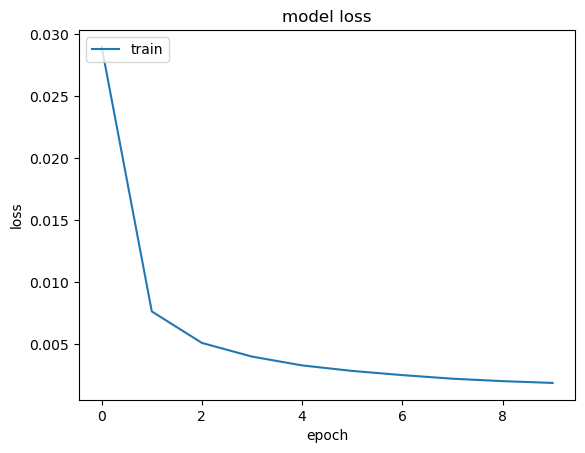

In [4]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()